In [1]:
#Using Kaggle Dataset: Chess Positions to build a machine learning model that can take chess board input images and return the board status following FEN

In [2]:
"""
Data exploration
Images are 400x400 pixels
They are generated from 28 styles of boards and 32 styles of chess pieces
Number of images in the train set= 80,000
"""

'\nData exploration\nImages are 400x400 pixels\nThey are generated from 28 styles of boards and 32 styles of chess pieces\nNumber of images in the train set= 80,000\n'

In [3]:
#Loading data
#the data is in the name of the file, the data is not labelled
import numpy as np # Use to store the images as arrays that can be used as input in models
from PIL import Image # Basic library to work with images
import glob # Used to grab the list of file names in a folder. It will be used to load all the images.
import matplotlib.pyplot as plt  # plotting library, it will be used to show the images stored as array in form of images. Could also be used to plot other data if needed.

In [7]:
# loading 100 images for exploration
image_list = glob.glob("C:/Users/chaar/Desktop/CPPR/Chess_Positions/train/*.jpeg") # find all jpeg images in the given path
nb_image = 100
image_size = 400 

In [8]:
#function to load images in grayscale
def load_images_gray(image_list, nb_images, image_size=400):
    X = np.empty([nb_images, image_size, image_size], np.int32) # we will store the images in a 4D array with the first dimension being the  
    y = []

    for i, img_path in enumerate(image_list[:nb_images]):
        img_label = img_path.split("\\")[1].split(".")[0] # get label
        img_array = np.array(Image.open(img_path).convert('L'))

        X[i] = img_array
        y.append(img_label)
    return X, y

In [9]:
X_explore, y_explore = load_images_gray(image_list, nb_image, image_size=400)
print(X_explore[0].shape)
print(y_explore[0])

(400, 400)
1b1B1b2-2pK2q1-4p1rB-7k-8-8-3B4-3rb3


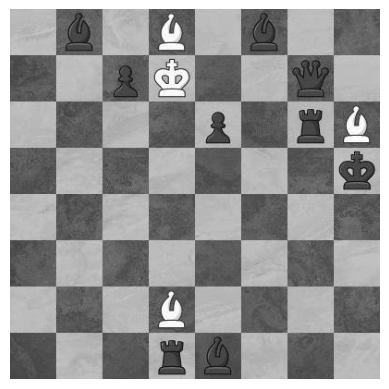

In [10]:
plt.imshow(X_explore[0], cmap = 'gray')
plt.axis('off')
plt.show()

In [11]:
#Label parsing
#The label as it is will be difficult to use so, transforming it to a numpy array with label encoder
pieces_encoding = {'K': 1, 'Q': 2, 'R': 3, 'B': 4, 'N': 5, 'P': 6, 'k': 7, 'q': 8, 'r': 9, 'b': 10, 'n': 11, 'p': 12}

In [12]:
#function for parsing labels
def parsing_label(img_label):
    rows = img_label.split("-")
    
    board_status = np.zeros((8, 8))
    for i, row in enumerate(rows):
        col = 0
        for c in row:
            if c.isdigit():  #if the character is a digit: empty square count
                col+=int(c)
            else:   #if the character is not a digit, its a chess piece
                board_status[i, col] = int(pieces_encoding[c])
                col+=1
    return board_status

In [13]:
parsing_label(y_explore[0])

array([[ 0., 10.,  0.,  4.,  0., 10.,  0.,  0.],
       [ 0.,  0., 12.,  1.,  0.,  0.,  8.,  0.],
       [ 0.,  0.,  0.,  0., 12.,  0.,  9.,  4.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  7.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  4.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  9., 10.,  0.,  0.,  0.]])

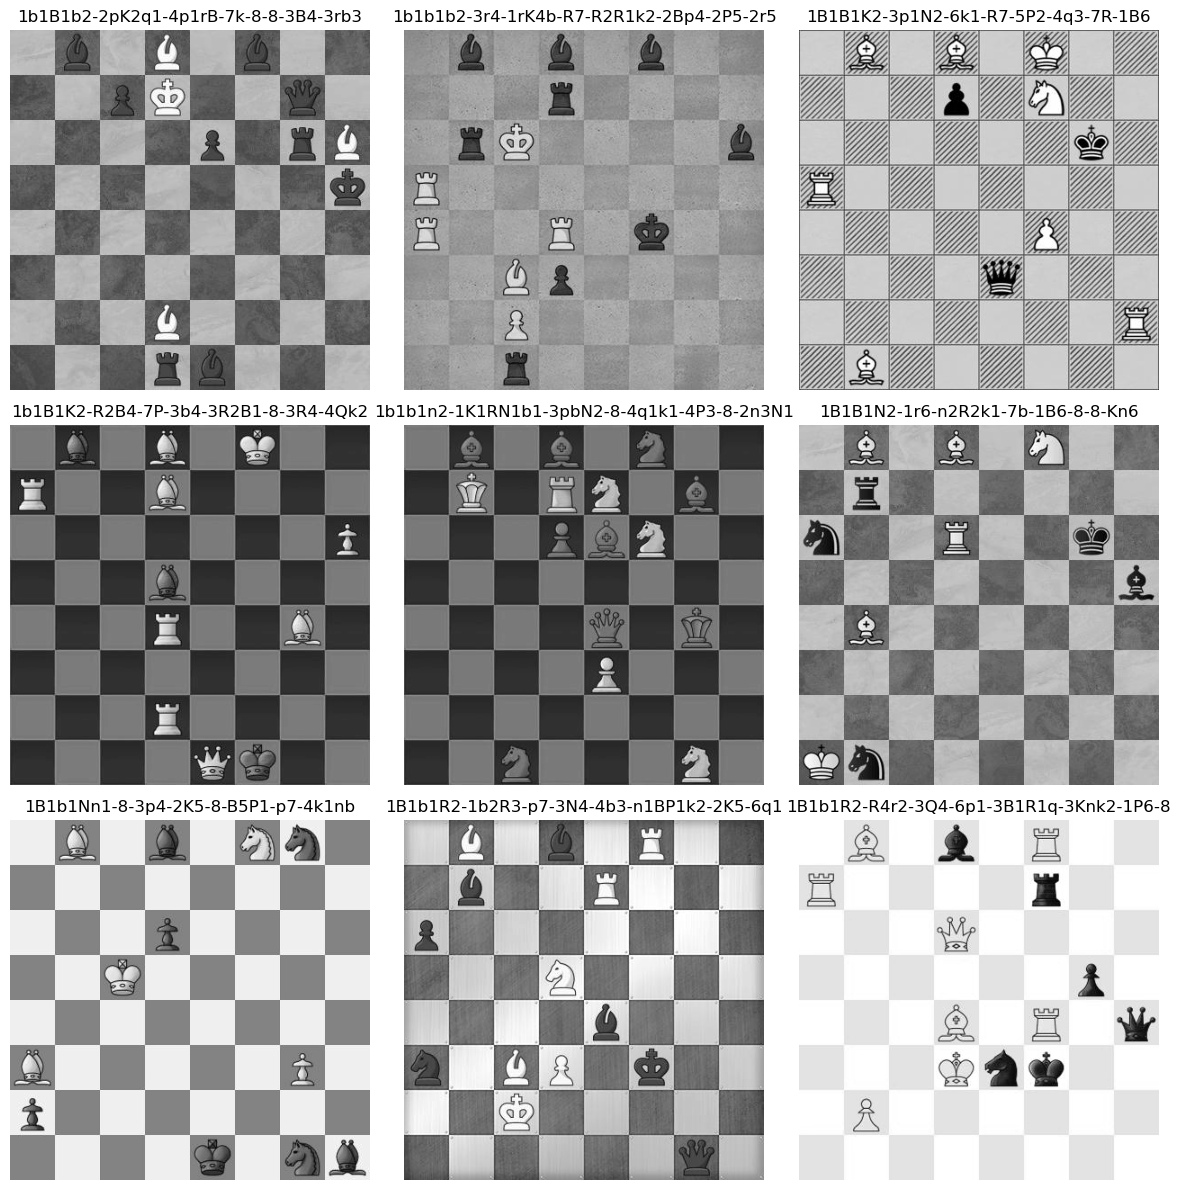

In [14]:
#data quality; visualization
fig, axs = plt.subplots(3, 3, figsize=(12, 12))  #creates a figure and an array of subplots arranged in a 3x3 grid
i = 0
for y in range(3):
    for x in range(3):  
        img = X_explore[i]     
        axs[y,x].imshow(img, cmap='gray')
        axs[y,x].set_title(f"{y_explore[i]}") #sets the title of the subplot to the corresponding label from the y_explore dataset
        axs[y,x].set_axis_off() #removes the axis ticks and labels
        
        i += 1
fig.tight_layout() #adjusts the spacing between subplots to avoid overlapping
plt.show()

In [15]:
# checking the label parsing on the images of the first row 
for i in range(3):
    print(parsing_label(y_explore[i]))
    print('\n')

[[ 0. 10.  0.  4.  0. 10.  0.  0.]
 [ 0.  0. 12.  1.  0.  0.  8.  0.]
 [ 0.  0.  0.  0. 12.  0.  9.  4.]
 [ 0.  0.  0.  0.  0.  0.  0.  7.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  4.  0.  0.  0.  0.]
 [ 0.  0.  0.  9. 10.  0.  0.  0.]]


[[ 0. 10.  0. 10.  0. 10.  0.  0.]
 [ 0.  0.  0.  9.  0.  0.  0.  0.]
 [ 0.  9.  1.  0.  0.  0.  0. 10.]
 [ 3.  0.  0.  0.  0.  0.  0.  0.]
 [ 3.  0.  0.  3.  0.  7.  0.  0.]
 [ 0.  0.  4. 12.  0.  0.  0.  0.]
 [ 0.  0.  6.  0.  0.  0.  0.  0.]
 [ 0.  0.  9.  0.  0.  0.  0.  0.]]


[[ 0.  4.  0.  4.  0.  1.  0.  0.]
 [ 0.  0.  0. 12.  0.  5.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  7.  0.]
 [ 3.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  6.  0.  0.]
 [ 0.  0.  0.  0.  8.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  3.]
 [ 0.  4.  0.  0.  0.  0.  0.  0.]]




In [16]:
#Label Distribution check
y_explore_parsed = np.empty((nb_image, 8, 8), np.int32)
for i, label in enumerate(y_explore):
    y_explore_parsed[i] = parsing_label(label)

In [17]:
value_count = {'K': 0, 'Q': 0, 'R': 0, 'B': 0, 'N': 0, 'P': 0, 'k': 0, 'q': 0, 'r': 0, 'b': 0, 'n': 0, 'p': 0}
for k, v in pieces_encoding.items():
    
    count = np.count_nonzero(y_explore_parsed == v)
    value_count[k] += count
    print(k, count)
print(value_count)

K 100
Q 35
R 91
B 164
N 84
P 103
k 100
q 48
r 89
b 200
n 104
p 99
{'K': 100, 'Q': 35, 'R': 91, 'B': 164, 'N': 84, 'P': 103, 'k': 100, 'q': 48, 'r': 89, 'b': 200, 'n': 104, 'p': 99}


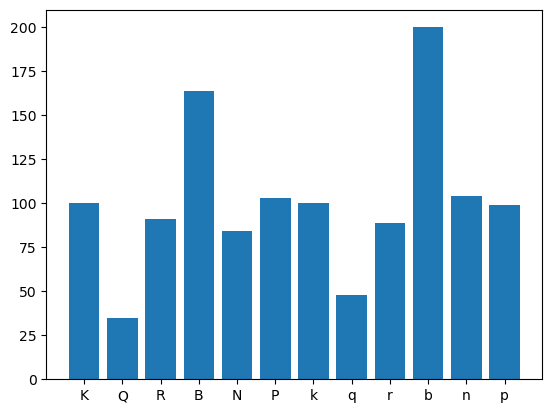

In [18]:
plt.bar(value_count.keys(), value_count.values())
plt.show()

In [19]:
#Full data loading; taking only 1000 images for now since the dataset is huge

In [21]:
image_list = glob.glob("C:/Users/chaar/Desktop/CPPR/Chess_Positions/train/*.jpeg") # find all jpeg images in the given path
nb_image = 1000

X, y = load_images_gray(image_list, nb_image, image_size=400)

print(X[0].shape)
print(y[0])

(400, 400)
1b1B1b2-2pK2q1-4p1rB-7k-8-8-3B4-3rb3


In [22]:
#grayscale makes the process easier

(-0.5, 399.5, 399.5, -0.5)

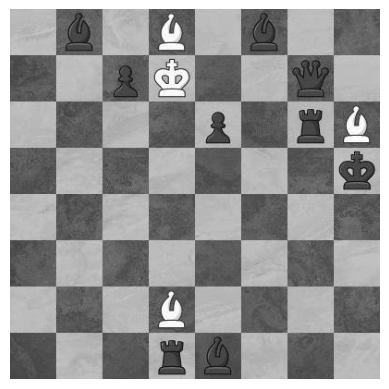

In [23]:
plt.imshow(X[0], cmap='gray')
plt.axis('off')

In [24]:
#data preparation
#need to split the images into 64 smaller images
def split_cells(X, y, images_to_process, image_size=400):
    size_cell = image_size//8
    X_cells = np.empty((images_to_process*64, size_cell, size_cell), dtype=np.int32)
    y_cells = np.empty(images_to_process*64)
    y_parsed = [parsing_label(label) for label in y]
    for i in range(images_to_process):
        for j in range(8):
            for k in range(8):
                X_cells[i*64+j*8+k] = X[i][j*size_cell: (j+1)*size_cell, k*size_cell: (k+1)*size_cell]
                y_cells[i*64+j*8+k] = y_parsed[i][j][k]
    return X_cells, y_cells

In [25]:
X_cells, y_cells = split_cells(X, y, nb_image, image_size=400)

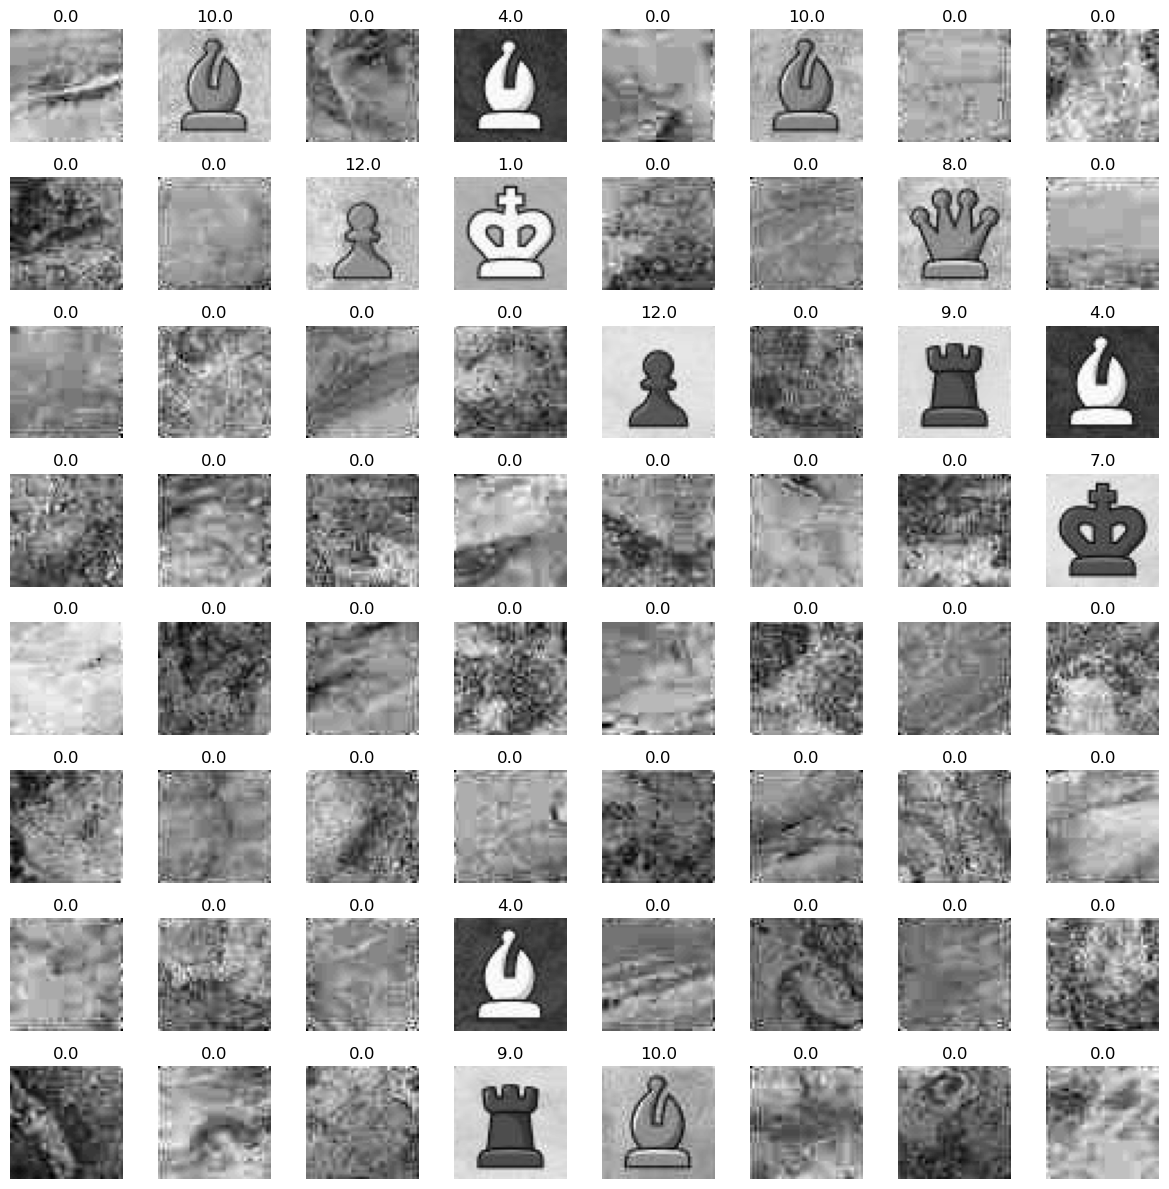

In [26]:
fig, axs = plt.subplots(8, 8, figsize=(12, 12))
i = 0
for y in range(8):
    for x in range(8):  
        img = X_cells[i]     
        axs[y,x].imshow(img, cmap='gray')
        axs[y,x].set_title(f"{y_cells[i]}")
        axs[y, x].set_axis_off()
        i += 1
fig.tight_layout()
plt.show()

In [27]:
print(X_cells.shape)
print(y_cells.shape)

(64000, 50, 50)
(64000,)


In [28]:
#Our dataset is now ready with 64000 small images (50x50) that can be put in a CNN classifier.

In [29]:
#Modelisation
"""
Starting with a simple model with a low number of parameters
"""
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras import Sequential

In [30]:
#Model definition
CNN_model = Sequential([Conv2D(16, 3, input_shape=(50, 50, 1)),
            MaxPooling2D(),
            Conv2D(8, 3),
            MaxPooling2D(),
            Flatten(),
            Dense(128, activation='relu'),
            Dropout(0.3),
            Dense(32, activation='relu'),
            Dropout(0.3),
            Dense(13, activation='softmax')])

CNN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 8)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 968)               0         
                                                                 
 dense (Dense)               (None, 128)               1

In [31]:
#sparse_categorical_crossentropy is a loss function commonly used in multi-class classification tasks where the target labels are integers rather than one-hot encoded vectors.
CNN_model.compile(loss='sparse_categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

In [32]:
#Model training & performance evaluation

In [33]:
def plot_results(history):
    hist_df = pd.DataFrame(history.history)
    hist_df.columns=["loss", "accuracy", "val_loss", "val_accuracy"]
    hist_df.index = np.arange(1, len(hist_df)+1)
    
    fig, axs = plt.subplots(nrows=2, sharex=True, figsize=(16, 10))
    axs[0].plot(hist_df.val_accuracy, lw=3, label='Validation Accuracy')
    axs[0].plot(hist_df.accuracy, lw=3, label='Training Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].grid()
    axs[0].legend(loc=0)
    axs[1].plot(hist_df.val_loss, lw=3, label='Validation Loss')
    axs[1].plot(hist_df.loss, lw=3, label='Training Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].grid()
    axs[1].legend(loc=0)
    
    plt.show();

In [34]:
epochs = 30
batch_size = 128
history = CNN_model.fit(X_cells, y_cells, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/30
400/400 [==============================] - 20s 49ms/step - loss: 3.6624 - accuracy: 0.7382 - val_loss: 0.4725 - val_accuracy: 0.8222
Epoch 2/30
400/400 [==============================] - 23s 59ms/step - loss: 0.5355 - accuracy: 0.8229 - val_loss: 0.4227 - val_accuracy: 0.8587
Epoch 3/30
400/400 [==============================] - 24s 59ms/step - loss: 0.4428 - accuracy: 0.8476 - val_loss: 0.3339 - val_accuracy: 0.8693
Epoch 4/30
400/400 [==============================] - 23s 58ms/step - loss: 0.3745 - accuracy: 0.8613 - val_loss: 0.2836 - val_accuracy: 0.9114
Epoch 5/30
400/400 [==============================] - 23s 57ms/step - loss: 0.3199 - accuracy: 0.8881 - val_loss: 0.2088 - val_accuracy: 0.9177
Epoch 6/30
400/400 [==============================] - 23s 58ms/step - loss: 0.2636 - accuracy: 0.9084 - val_loss: 0.1539 - val_accuracy: 0.9614
Epoch 7/30
400/400 [==============================] - 24s 60ms/step - loss: 0.2141 - accuracy: 0.9304 - val_loss: 0.0871 - val_accuracy:

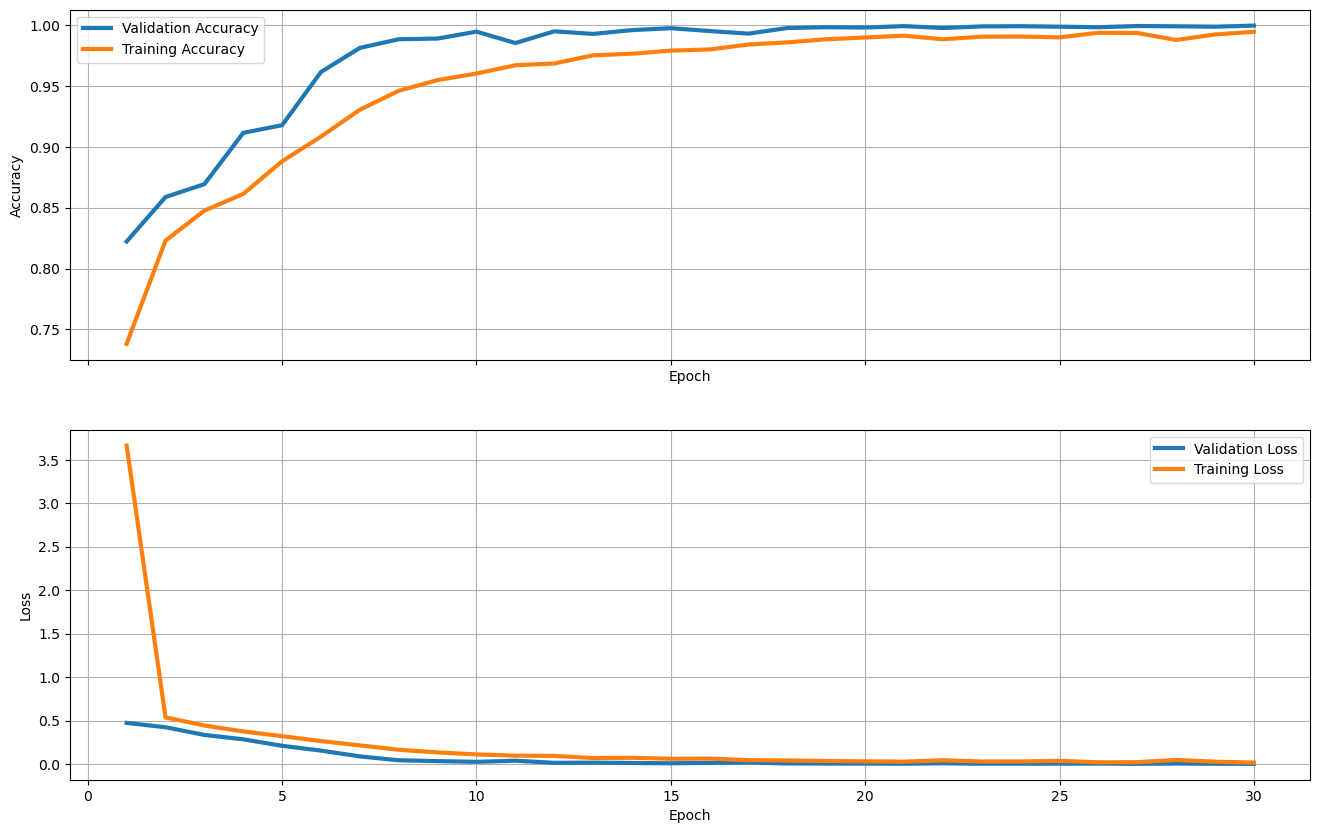

In [35]:
import pandas as pd
plot_results(history)

In [36]:
avg_train_accuracy = np.mean(history.history['accuracy'])
avg_val_accuracy = np.mean(history.history['val_accuracy'])

print("Average Training Accuracy:", avg_train_accuracy)
print("Average Validation Accuracy:", avg_val_accuracy)

Average Training Accuracy: 0.9520794252554575
Average Validation Accuracy: 0.9742630203564961


In [37]:
#99% accuracy on validation set

In [38]:
#one drawback of the chosen method is that the training set has a huge number of empty cells compared to the other type of images.
#additional data processing
nb_images = 5000  #increasing the number of training images
X, y = load_images_gray(image_list, nb_images, image_size=400)
X_cells, y_cells = split_cells(X, y, nb_images)

data_df = pd.DataFrame(X_cells.reshape(X_cells.shape[0],2500)) #df requires 2D inputl 50*50=2500
data_df['label'] = y_cells
data_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,label
0,185,186,186,187,188,189,190,190,191,191,...,199,197,193,194,199,200,195,193,187,0.0
1,112,107,109,109,109,105,111,110,108,106,...,102,102,103,104,104,113,105,106,128,10.0
2,188,189,188,178,181,183,186,189,192,193,...,186,190,192,210,192,191,198,203,186,0.0
3,108,119,118,104,96,100,101,96,97,105,...,109,108,109,111,112,111,108,105,103,4.0
4,194,193,192,191,189,188,186,186,192,192,...,191,191,190,190,191,191,191,192,190,0.0


In [39]:
#gives count of every unique value
data_df['label'].value_counts()

0.0     267245
10.0      5565
4.0       5527
1.0       5000
7.0       5000
6.0       4638
5.0       4634
12.0      4591
11.0      4590
9.0       4393
3.0       4381
8.0       2223
2.0       2213
Name: label, dtype: int64

In [40]:
# split empty cells and other cells
pieces_df = data_df[data_df['label'] != 0]
empty_cells_df = data_df[data_df['label'] == 0]

In [41]:
# sample random 5000 empty cells in the dataframe
empty_cells_df = empty_cells_df.sample(n=5000)
undersampled_data_df = pd.concat([pieces_df, empty_cells_df])

In [42]:
# as all the empty cells are now at the end of the dataset, let's shuffle it to avoid any issues
undersampled_data_df = undersampled_data_df.sample(frac = 1)
undersampled_data_df['label'].value_counts()

10.0    5565
4.0     5527
1.0     5000
0.0     5000
7.0     5000
6.0     4638
5.0     4634
12.0    4591
11.0    4590
9.0     4393
3.0     4381
8.0     2223
2.0     2213
Name: label, dtype: int64

In [43]:
undersampled_data_df.to_csv('5000_boards_trainset.csv', index=False)

In [44]:
#adding batch normalization and more parameters by adding a Dense layer
CNN_model = Sequential([Conv2D(32, 3, input_shape=(50, 50, 1), padding='same'),
            MaxPooling2D(),
            Conv2D(32, 3),
            MaxPooling2D(),
            Conv2D(16, 3),
            Flatten(),
            Dense(256, activation='relu'),
            BatchNormalization(),
            Dropout(0.1),
            Dense(512, activation='relu'),
            BatchNormalization(),
            Dropout(0.1),
            Dense(128, activation='relu'),
            BatchNormalization(),
            Dropout(0.1),
            Dense(13, activation='softmax')])

CNN_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 50, 50, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 23, 23, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 11, 11, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 9, 9, 16)          4624      
                                                                 
 flatten_1 (Flatten)         (None, 1296)             

In [45]:
CNN_model.compile(loss='sparse_categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

In [47]:
%%time
epochs = 30
batch_size = 256

history = CNN_model.fit(X_cells[:, : , :, np.newaxis], y_cells, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/30
1000/1000 [==============================] - 270s 270ms/step - loss: 0.0332 - accuracy: 0.9925 - val_loss: 0.2597 - val_accuracy: 0.9697
Epoch 2/30
1000/1000 [==============================] - 283s 283ms/step - loss: 0.0022 - accuracy: 0.9995 - val_loss: 2.6877e-04 - val_accuracy: 1.0000
Epoch 3/30
1000/1000 [==============================] - 275s 275ms/step - loss: 0.0178 - accuracy: 0.9953 - val_loss: 0.0046 - val_accuracy: 0.9987
Epoch 4/30
1000/1000 [==============================] - 263s 263ms/step - loss: 0.0017 - accuracy: 0.9995 - val_loss: 6.4748e-04 - val_accuracy: 0.9999
Epoch 5/30
1000/1000 [==============================] - 263s 263ms/step - loss: 0.0310 - accuracy: 0.9908 - val_loss: 2.1007 - val_accuracy: 0.8656
Epoch 6/30
1000/1000 [==============================] - 263s 263ms/step - loss: 0.0173 - accuracy: 0.9946 - val_loss: 0.1280 - val_accuracy: 0.9820
Epoch 7/30
1000/1000 [==============================] - 259s 259ms/step - loss: 0.0089 - accuracy: 0.997

In [48]:
avg_train_accuracy = np.mean(history.history['accuracy'])
avg_val_accuracy = np.mean(history.history['val_accuracy'])

print("Average Training Accuracy:", avg_train_accuracy)
print("Average Validation Accuracy:", avg_val_accuracy)

Average Training Accuracy: 0.9982825537522634
Average Validation Accuracy: 0.9415765662988027


In [49]:
#both the accuracies have increased

In [50]:
#Inference 

In [51]:
#inference pipeline:
"""
take a full image
create the 64 small images per full board
classify the 64 images
transform to FEN labels
"""

'\ntake a full image\ncreate the 64 small images per full board\nclassify the 64 images\ntransform to FEN labels\n'

In [53]:
# load test image list 
image_list_test = glob.glob("C:/Users/chaar/Desktop/CPPR/Chess_Positions/test/*.jpeg")

nb_images_test = 1000 # len(image_list_test)
X_test, y_test = load_images_gray(image_list_test, nb_images_test)

print(X_test[0].shape)
print(y_test[0])

(400, 400)
1b1B1Qr1-7p-6r1-2P5-4Rk2-1K6-4B3-8


In [54]:
X_test_cells, y_test_cells = split_cells(X_test, y_test, nb_images_test)

In [55]:
from tensorflow.keras.models import load_model
size_cell = image_size//8
# compute result cell by cell
result = np.argmax(CNN_model.predict(X_test_cells.reshape((nb_images_test*64, size_cell, size_cell,1))), axis=1)
# reshape result to get the chess board shape
result_board = result.reshape((nb_images_test, 8, 8))
result_board[1]

2000/2000 [==============================] - 21s 10ms/step


array([[ 0,  4,  0,  4,  0,  0,  1,  0],
       [ 0,  4,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  5,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  7,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 11,  8,  0,  0]], dtype=int64)

In [56]:
from tensorflow.math import confusion_matrix
from sklearn.metrics import accuracy_score

print(f'Accuracy on {nb_images_test} test images (ie: {nb_images_test*64} cells) {accuracy_score(y_test_cells,result )*100:.2f}%')
print('\nConfusion matrix:\n', np.array(confusion_matrix(y_test_cells,result )))

Accuracy on 1000 test images (ie: 64000 cells) 99.93%

Confusion matrix:
 [[53537     0     0     0     0     0     0     0     0     0    40     0
      0]
 [    0  1000     0     0     0     0     0     0     0     0     0     0
      0]
 [    0     0   449     0     0     0     0     0     0     0     0     0
      0]
 [    0     0     0   869     0     0     0     0     0     0     0     0
      0]
 [    0     0     0     0  1180     0     0     0     0     0     0     0
      0]
 [    0     0     0     0     1   848     0     0     0     0     0     0
      0]
 [    0     0     0     0     0     0   919     0     0     0     0     0
      0]
 [    0     0     0     0     0     0     0  1000     0     0     0     0
      0]
 [    0     0     0     0     0     0     0     0   427     2     0     1
      0]
 [    0     0     0     0     0     0     0     0     0   860     0     0
      0]
 [    0     0     0     0     0     0     0     0     0     0  1194     0
      0]
 [    0     0

In [57]:
# compute the inverse of the encoding dictionnary (from class number to piece letter in FEN notation)
number_to_pieces = {v: k for k,v in pieces_encoding.items()}
print(number_to_pieces)

{1: 'K', 2: 'Q', 3: 'R', 4: 'B', 5: 'N', 6: 'P', 7: 'k', 8: 'q', 9: 'r', 10: 'b', 11: 'n', 12: 'p'}


In [58]:
def array_to_string(board_array):
    """ Function that takes a chess board array with pieces class number
        return a string following FEN notation to describe pieces position on chess board
    """
    out_string = ''
    for i in range(8):
        out_string += '-'
        j = 0
        empty_cells = 0
        while j < 8:
            if board_array[i, j] == 0:
                empty_cells += 1
            else:
                if empty_cells > 0:
                    out_string += str(empty_cells)
                    empty_cells = 0
                out_string += str(number_to_pieces[board_array[i, j]])
            j += 1
        if empty_cells > 0: out_string += str(empty_cells)
    return out_string[1: ]

In [59]:
success = []

for i in range(nb_images_test):
    img = result_board[i]
    out_string = array_to_string(img)
    original_str = image_list_test[i].split('\\')[-1].split('.')[0]
    if i < 5:
        print('predicted string {}:   '.format(i), out_string)
        print('original image name {}:'.format(i), original_str)
    success.append(out_string == original_str)

predicted string 0:    1b1B1Qr1-7p-6r1-2P5-4Rk2-1K6-4B3-8
original image name 0: 1b1B1Qr1-7p-6r1-2P5-4Rk2-1K6-4B3-8
predicted string 1:    1B1B2K1-1B6-5N2-6k1-8-8-8-4nq2
original image name 1: 1B1B2K1-1B6-5N2-6k1-8-8-8-4nq2
predicted string 2:    1b1b2K1-1r6-2P4p-1b1p4-4N1k1-3B2Q1-2q5-2N2q2
original image name 2: 1b1b2K1-1r6-2P4p-1b1p4-4N1k1-3B2Q1-2q5-2N2q2
predicted string 3:    1b1b2k1-K2B1q2-R3B2p-3b1NR1-5p2-3N4-8-5N2
original image name 3: 1b1b2k1-K2B1q2-R3B2p-3b1NR1-5p2-3N4-8-5N2
predicted string 4:    1B1B3R-8-1b2k3-8-2n5-1rK5-b7-8
original image name 4: 1B1B3R-8-1b2k3-8-2n5-1rK5-b7-8


In [60]:
print(f'Accuracy of FEN notation predictions over {nb_images_test} test images: {sum(success)/len(success)*100:.2f}%')

Accuracy of FEN notation predictions over 1000 test images: 95.70%


Predicted string 0:    1b1B1Qr1-7p-6r1-2P5-4Rk2-1K6-4B3-8
Original image name 0: 1b1B1Qr1-7p-6r1-2P5-4Rk2-1K6-4B3-8


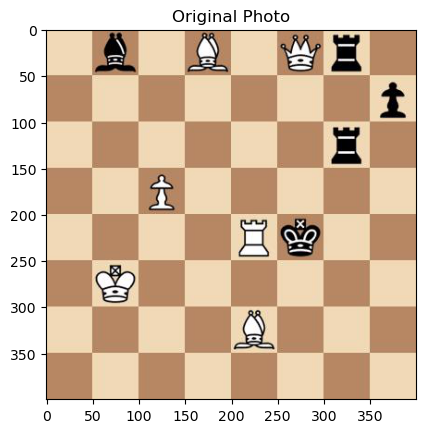

Predicted matrix 0:
[[ 0 10  0  4  0  2  9  0]
 [ 0  0  0  0  0  0  0 12]
 [ 0  0  0  0  0  0  9  0]
 [ 0  0  6  0  0  0  0  0]
 [ 0  0  0  0  3  7  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  0  0  0  4  0  0  0]
 [ 0  0  0  0  0  0  0  0]]

Predicted string 1:    1B1B2K1-1B6-5N2-6k1-8-8-8-4nq2
Original image name 1: 1B1B2K1-1B6-5N2-6k1-8-8-8-4nq2


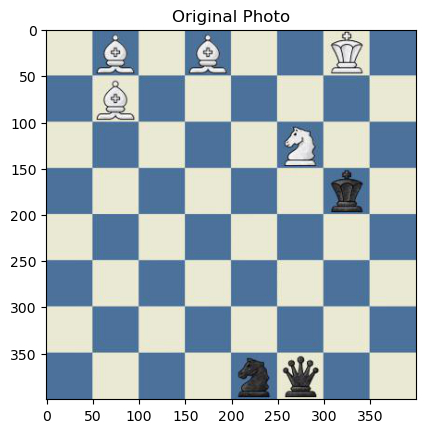

Predicted matrix 1:
[[ 0  4  0  4  0  0  1  0]
 [ 0  4  0  0  0  0  0  0]
 [ 0  0  0  0  0  5  0  0]
 [ 0  0  0  0  0  0  7  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0 11  8  0  0]]

Predicted string 2:    1b1b2K1-1r6-2P4p-1b1p4-4N1k1-3B2Q1-2q5-2N2q2
Original image name 2: 1b1b2K1-1r6-2P4p-1b1p4-4N1k1-3B2Q1-2q5-2N2q2


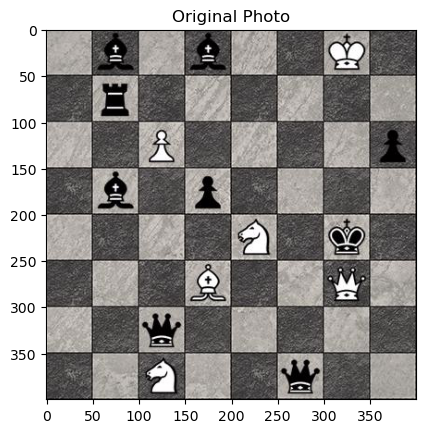

Predicted matrix 2:
[[ 0 10  0 10  0  0  1  0]
 [ 0  9  0  0  0  0  0  0]
 [ 0  0  6  0  0  0  0 12]
 [ 0 10  0 12  0  0  0  0]
 [ 0  0  0  0  5  0  7  0]
 [ 0  0  0  4  0  0  2  0]
 [ 0  0  8  0  0  0  0  0]
 [ 0  0  5  0  0  8  0  0]]

Predicted string 3:    1b1b2k1-K2B1q2-R3B2p-3b1NR1-5p2-3N4-8-5N2
Original image name 3: 1b1b2k1-K2B1q2-R3B2p-3b1NR1-5p2-3N4-8-5N2


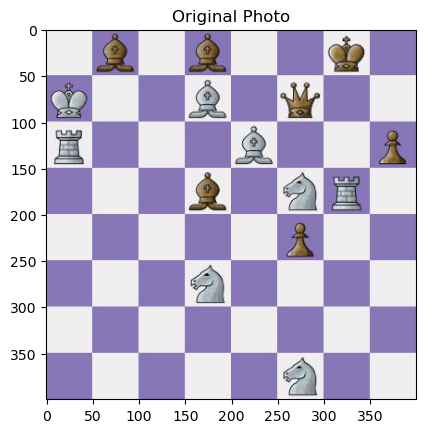

Predicted matrix 3:
[[ 0 10  0 10  0  0  7  0]
 [ 1  0  0  4  0  8  0  0]
 [ 3  0  0  0  4  0  0 12]
 [ 0  0  0 10  0  5  3  0]
 [ 0  0  0  0  0 12  0  0]
 [ 0  0  0  5  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  5  0  0]]

Predicted string 4:    1B1B3R-8-1b2k3-8-2n5-1rK5-b7-8
Original image name 4: 1B1B3R-8-1b2k3-8-2n5-1rK5-b7-8


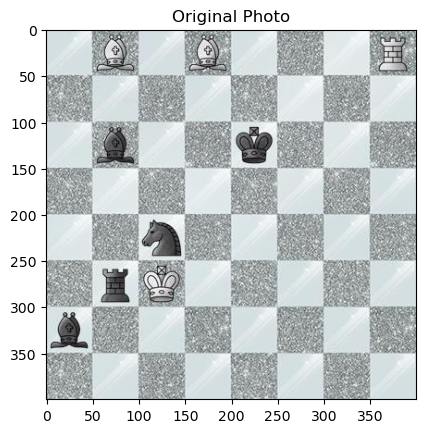

Predicted matrix 4:
[[ 0  4  0  4  0  0  0  3]
 [ 0  0  0  0  0  0  0  0]
 [ 0 10  0  0  7  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0 11  0  0  0  0  0]
 [ 0  9  1  0  0  0  0  0]
 [10  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]



In [61]:
import matplotlib.pyplot as plt
from PIL import Image

for i in range(nb_images_test):
    img = result_board[i]
    out_string = array_to_string(img)
    original_str = image_list_test[i].split('\\')[-1].split('.')[0]
    if i < 5:
        print('Predicted string {}:   '.format(i), out_string)
        print('Original image name {}:'.format(i), original_str)
        
        # Load and display the original photo
        original_photo = Image.open(image_list_test[i])
        plt.imshow(original_photo)
        plt.title('Original Photo')
        plt.show()

        # Display the predicted matrix
        print('Predicted matrix {}:'.format(i))
        print(img)
        print()


Predicted string:    1b1B1Qr1-7p-6r1-2P5-4Rk2-1K6-4B3-8
Original image name: 1b1B1Qr1-7p-6r1-2P5-4Rk2-1K6-4B3-8


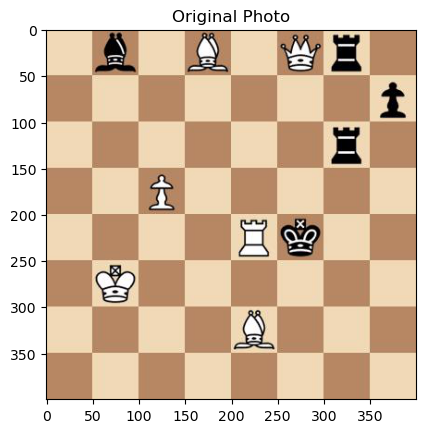

Predicted matrix:
[[ 0 10  0  4  0  2  9  0]
 [ 0  0  0  0  0  0  0 12]
 [ 0  0  0  0  0  0  9  0]
 [ 0  0  6  0  0  0  0  0]
 [ 0  0  0  0  3  7  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  0  0  0  4  0  0  0]
 [ 0  0  0  0  0  0  0  0]]


In [67]:
selected_index = 0

img = result_board[selected_index]
out_string = array_to_string(img)
original_str = image_list_test[selected_index].split('\\')[-1].split('.')[0]

print('Predicted string:   ', out_string)
print('Original image name:', original_str)

# Load and display the original photo
original_photo = Image.open(image_list_test[selected_index])
plt.imshow(original_photo)
plt.title('Original Photo')
plt.show()

# Display the predicted matrix
print('Predicted matrix:')
print(img)

In [68]:
out_string = out_string.replace('-', '/')
print(out_string)

1b1B1Qr1/7p/6r1/2P5/4Rk2/1K6/4B3/8


In [69]:
board = chess.Board(fen=out_string)

In [70]:
board.turn = chess.BLACK

In [71]:
#For better visualization of chessboard
def print_board_with_labels(board):
    print("    a b c d e f g h")
    print("  +-----------------+")
    
    #print the column labels
    for rank in range(7, -1, -1):
        row = f"{rank + 1} |"
        for file in range(8):
            piece = board.piece_at(chess.square(file, rank))
            row += f" {piece.symbol() if piece else '.'}"
        row += f" | {rank + 1}"
        print(row)

    print("  +-----------------+")
    print("    a b c d e f g h")

In [72]:
print_board_with_labels(board)

    a b c d e f g h
  +-----------------+
8 | . b . B . Q r . | 8
7 | . . . . . . . p | 7
6 | . . . . . . r . | 6
5 | . . P . . . . . | 5
4 | . . . . R k . . | 4
3 | . K . . . . . . | 3
2 | . . . . B . . . | 2
1 | . . . . . . . . | 1
  +-----------------+
    a b c d e f g h


In [74]:
#Generate legal moves for the board
try:
    legal_moves = list(board.legal_moves)
    print("Legal Moves:", legal_moves)
except Exception as e:
    print("Error:", e)

Legal Moves: [Move.from_uci('f4e4'), Move.from_uci('f4g3')]


In [75]:
#It assesses the number of legal moves available to a player's pieces and reflects their overall freedom of movement. 
def evaluate_piece_mobility(board):
    # Evaluate piece mobility by counting the number of legal moves available
    mobility_score = 0
    for move in board.generate_legal_moves():
        mobility_score += 1
    return mobility_score

In [76]:
mobility_score = evaluate_piece_mobility(board)
print("Mobility Score:", mobility_score)

Mobility Score: 2


In [77]:
#Pawn structure in chess refers to the arrangement and configuration of pawns on the chessboard
def evaluate_pawn_structure(board):
    pawn_structure_score = 0
    for square in chess.SQUARES:
        pawn = board.piece_at(square)
        if pawn is not None and pawn.piece_type == chess.PAWN:
            # Check for doubled pawns
            file_pawns = sum(1 for sq in chess.SQUARES if board.piece_at(sq) == pawn and chess.square_file(sq) == chess.square_file(square))
            if file_pawns > 1:
                pawn_structure_score -= 0.5

            # Check for isolated pawns
            adjacent_files = [chess.square_file(sq) for sq in chess.SQUARES if board.piece_at(sq) == pawn and sq != square]
            if chess.square_file(square) not in adjacent_files:
                pawn_structure_score -= 0.5
    return pawn_structure_score

In [78]:
print("Pawn structure score: ", evaluate_pawn_structure(board))

Pawn structure score:  -1.0


In [79]:
print("Coordination score: ", evaluate_piece_coordination(board))

Coordination score:  0.7999999999999999


In [80]:
print("Center control score: ",evaluate_center_control(board))

Center control score:  0.44999999999999996


In [81]:
print("Development score: ",evaluate_development(board))

Development score:  0.15000000000000002


In [82]:
print("Pawn promotion:" ,evaluate_pawn_promotion(board))

Pawn promotion: 0


In [83]:
print("King activity score: ",evaluate_king_activity(board))

King activity score:  0.7999999999999999


In [84]:
evaluate_threats_and_checks(board)

0.1

In [85]:
print("Control of keys: ",evaluate_control_of_key_squares(board))

Control of keys:  0.1


In [86]:
print("Material balance: ", evaluate_material_balance(board))

Material balance:  7


In [87]:
print("Draw position score:",evaluate_drawish_positions(board))

Draw position score: 0


In [88]:
print("Temporal factors score: ", evaluate_temporal_factors(board))

Temporal factors score:  0.2


In [89]:
print("Opponent weakness score: ",evaluate_opponents_weaknesses(board) )

Opponent weakness score:  0.30000000000000004


In [90]:
score = evaluate_position(board)
print("Evaluation Score:", score)

Evaluation Score: 35.199999999999974


In [91]:
%time best_score, best_move = find_best_move(board, depth=5)
print("Best Score: ", best_score)
print("Best Move:", best_move)

Position Hash: -3187210167191842451
Position Hash: -9095825651782791244
Wall time: 16 ms
Best Score:  35.199999999999974
Best Move: f4e4


In [92]:
evaluate_all_legal_moves(random_board, depth=3)

Position Hash: 5735200229727813359
Move: h8g8 Score: 38.74999999999999
Position Hash: 3478977861532755782
Move: h8f8 Score: 38.6
Position Hash: -8297350474275523577
Move: e8f8 Score: 38.39999999999999
Position Hash: -8562544010004071422
Move: e8e7 Score: 40.0
Position Hash: 5204096886703365518
Move: d8e7 Score: 42.99999999999998
Position Hash: -6136342057689568318
Move: b8c6 Score: 39.79999999999998
Position Hash: -4877594707815647239
Move: b8a6 Score: 39.599999999999994
Position Hash: 5769250437582780137
Move: f6g8 Score: 34.14999999999997
Position Hash: 1575621302523254448
Move: f6h5 Score: 36.04999999999998
Position Hash: -1739747950466562977
Move: f6d5 Score: 37.24999999999997
Position Hash: 5474626811890196151
Move: f6g4 Score: 40.34999999999999
Position Hash: 223427444407174645
Move: f6e4 Score: 40.599999999999994
Position Hash: -3917636001322327253
Move: e8g8 Score: 37.6
Position Hash: -8274322430046428060
Move: h7h6 Score: 39.699999999999996
Position Hash: -8526666415941422074
